# Tarea - Ajuste de curvas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from google.colab import drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [6]:
# Datos extraidos de la página de quandl
y_costo = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 27$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

In [7]:
# Definimos las funciones necesarias para el ajuste de curvas.
def fhat(beta, x):
    X = np.array([x**i for i in range(len(beta))]).T # Crea la matriz X de diseño [x^0, x^1, ...]
    return X @ beta

def costo(beta, x, y): # Criterio de optimización (Error Cuadrático Acumulado - SSE):
    yhat = fhat(beta, x)
    return np.sum((y - yhat)**2)

In [8]:
x_costo = np.arange(len(y_costo)) # (x): 2014 -> 0, 2040 -> 26
años_reales = x_costo + 2014 # Para el eje X de la gráfica

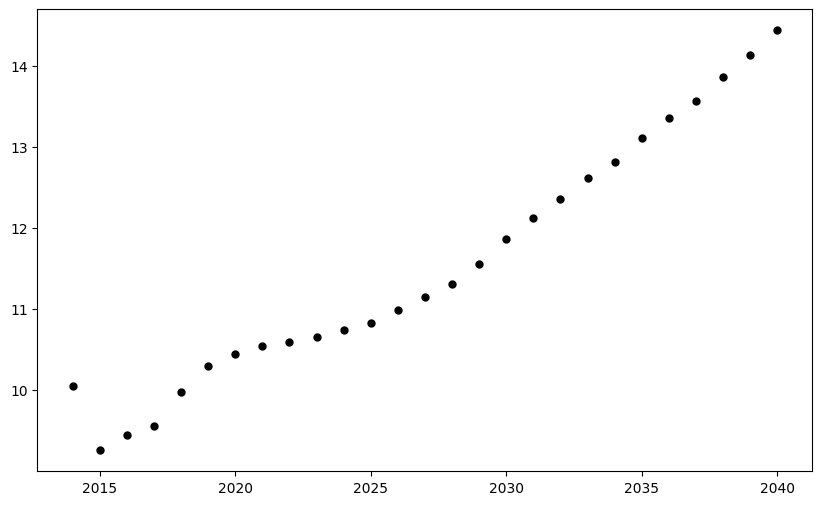

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(años_reales, y_costo, 'ok', ms=5, label='Datos Originales (2014-2040)')

Grado 1: Coeficientes Beta = [9.11562596 0.18667355]
Grado 2: Coeficientes Beta = [9.59135137e+00 7.25124216e-02 4.39064201e-03]
Grado 3: Coeficientes Beta = [9.56561948e+00 8.56277632e-02 3.10621652e-03 3.29202345e-05]


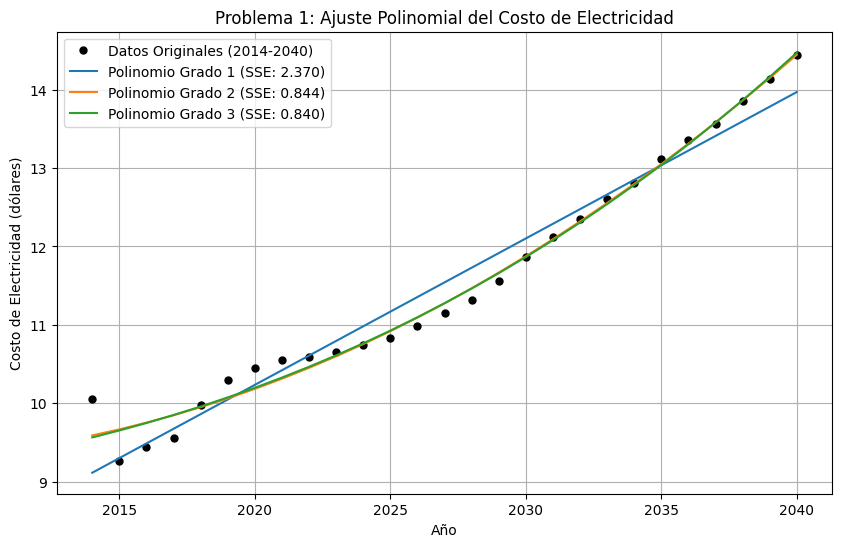

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(años_reales, y_costo, 'ok', ms=5, label='Datos Originales (2014-2040)')
for grado in range(1, 4): # Condición inicial: vector de tamaño (grado + 1)
    beta_inicial = np.random.rand(grado + 1) # Se usa np.random.rand() para generar el array inicial.
    sol = opt.minimize(costo, beta_inicial, args=(x_costo, y_costo), method='Nelder-Mead') # Optimización por Mínimos Cuadrados
    f_ajustada = fhat(sol.x, x_costo) # Generar la curva ajustada
    plt.plot(años_reales, f_ajustada, label=f'Polinomio Grado {grado} (SSE: {sol.fun:.3f})') # Graficar la curva ajustada
    print(f"Grado {grado}: Coeficientes Beta = {sol.x}")

# Etiquetar y mostrar
plt.title('Problema 1: Ajuste Polinomial del Costo de Electricidad')
plt.xlabel('Año')
plt.ylabel('Costo de Electricidad (dólares)')
plt.legend()
plt.grid(True)
plt.show()

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

In [16]:
# Montaje de Google Drive e Importación de Datos
drive.mount('/content/drive')

# Ruta del archivo en Google Drive
ruta_archivo_drive = '/content/drive/MyDrive/Colab Notebooks/population_data.csv'

# Importar datos
datos_poblacion = pd.read_csv(ruta_archivo_drive)

# --- Preparación de Variables ---
# Variable independiente escalada (x): 1950 -> 0, ..., 2015 -> 65
x_pob = np.arange(len(datos_poblacion))
años_reales = datos_poblacion['Year'].values # Años reales para el eje X


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




> Afortunadamente, ya están definidas las funciones, por lo que nos ahorramos un paso.



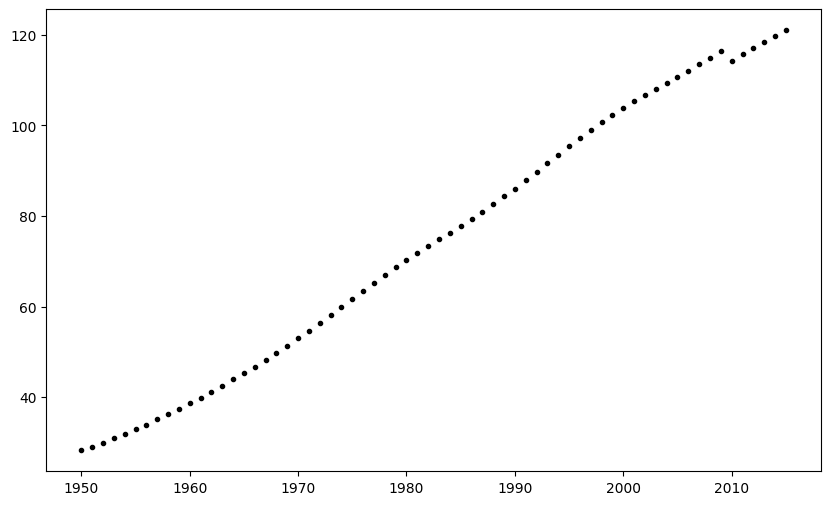

In [17]:
# Población vs. Año
y_poblacion = datos_poblacion['Poblacion'].values

# Almacenamiento de soluciones y errores
sol_poblacion = {}
errores_poblacion = []
grados = [1, 2, 3]

# Gráfico de Curvas Ajustadas (Población)
plt.figure(figsize=(10, 6))
# Escalamos a millones para mejor visualización (Población / 1000)
plt.plot(años_reales, y_poblacion / 1000, 'ok', ms=3, label='Datos de Población (en miles)')

Grado 1: [24138.01578643  1543.9734066 ]
Grado 2: [2.44204084e+04 1.51709298e+03 4.14841860e-01]
Grado 3: [ 3.89002735e+03  3.66592713e+03 -6.04950832e+01  5.10792419e-01]


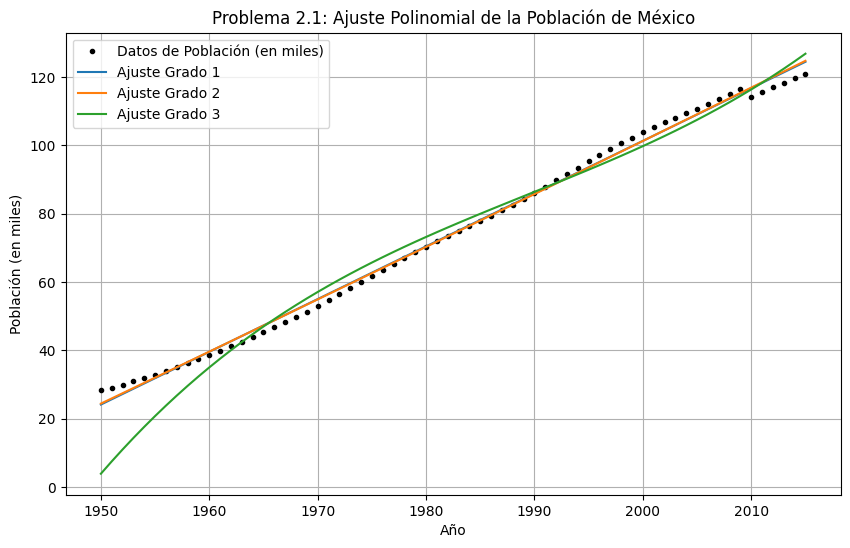

In [18]:
# Gráfico de Curvas Ajustadas (Población)
plt.figure(figsize=(10, 6))
# Escalamos a millones para mejor visualización (Población / 1000)
plt.plot(años_reales, y_poblacion / 1000, 'ok', ms=3, label='Datos de Población (en miles)')

for grado in grados:
    beta_inicial = np.random.rand(grado + 1)
    sol = opt.minimize(costo, beta_inicial, args=(x_pob, y_poblacion), method='Nelder-Mead') # Optimizamos en la escala original de los datos
    sol_poblacion[grado] = sol
    errores_poblacion.append(sol.fun)
    f_ajustada = fhat(sol.x, x_pob) / 1000 # Escalamos a millones para la gráfica
    plt.plot(años_reales, f_ajustada, label=f'Ajuste Grado {grado}')
    print(f"Grado {grado}: {sol.x}") # Imprimir los coeficientes

# Etiquetar y mostrar
plt.title('Problema 2.1: Ajuste Polinomial de la Población de México')
plt.xlabel('Año')
plt.ylabel('Población (en miles)')
plt.legend()
plt.grid(True)
plt.show()

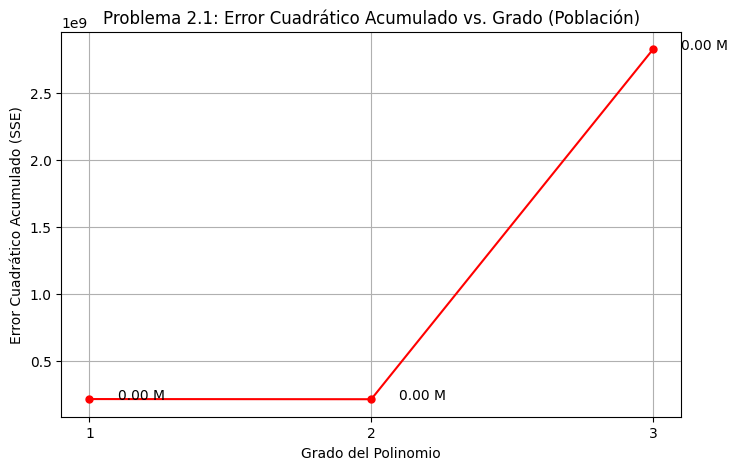

In [19]:
# Gráfico de Error Cuadrático Acumulado (SSE)
plt.figure(figsize=(8, 5))
plt.plot(grados, errores_poblacion, 'o-', color='red', ms=5)

# Añadir etiquetas de error
for i, error in enumerate(errores_poblacion):
    plt.text(grados[i] + 0.1, error, f'{error/1e12:.2f} M', fontsize=10) # Mostramos el error en millones (dividido por 1e12 o 1e6*1e6) para legibilidad (RECOMENDADO POR IA)

plt.title('Problema 2.1: Error Cuadrático Acumulado vs. Grado (Población)')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Error Cuadrático Acumulado (SSE)')
plt.xticks(grados)
plt.grid(True)
plt.show()

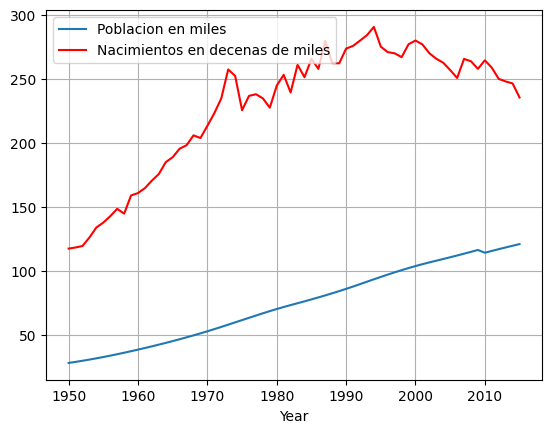

In [20]:
# Se muestra la gráfica. Vea como los datos son escalados, esto le ayudará en el cálculo
# de la regresión.

plt.plot(datos_poblacion.values[:,0],datos_poblacion.values[:,1]/1000,label=datos_poblacion.columns[1]+' en miles')
plt.plot(datos_poblacion.values[:,0],datos_poblacion.values[:,2]/10000,'r',label=datos_poblacion.columns[2]+' en decenas de miles')
plt.legend(loc=2)
plt.xlabel(datos_poblacion.columns[0])
plt.grid()

---

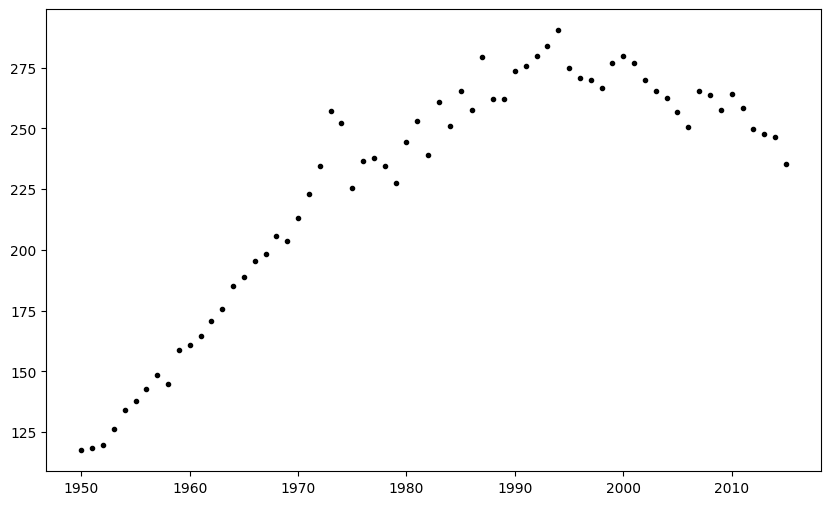

In [21]:
# Nacimientos vs. Año
y_nacimientos = datos_poblacion['Nacimientos'].values / 10000 # Escalamos los nacimientos a "decenas de miles" (dividir por 10000)

# Almacenamiento de soluciones
sol_nacimientos = {}
errores_nacimientos = []
grados = [1, 2, 3]

# Gráfico de Nacimientos
plt.figure(figsize=(10, 6))
# Graficamos en la escala de decenas de miles (Población / 10000)
plt.plot(años_reales, y_nacimientos, 'ok', ms=3, label='Datos de Nacimientos (en decenas de miles)')


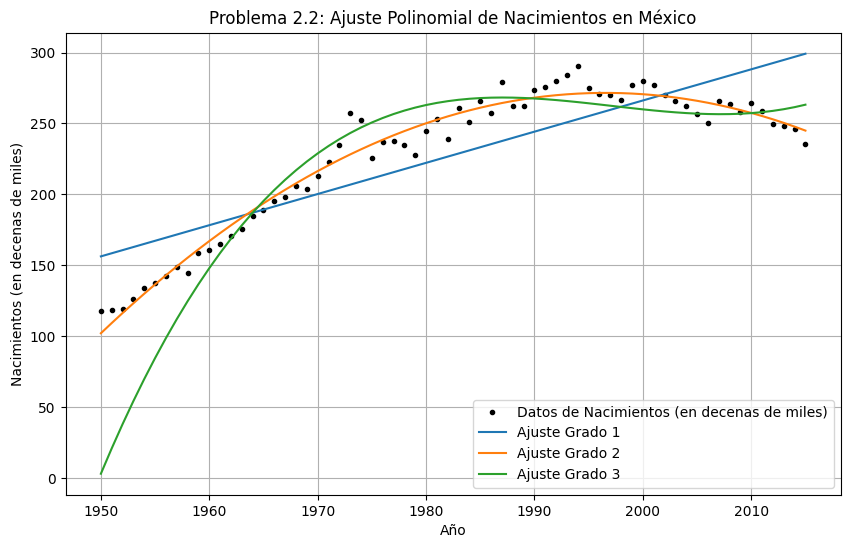

In [22]:
# Gráfico de Nacimientos
plt.figure(figsize=(10, 6))
# Graficamos en la escala de decenas de miles (Población / 10000)
plt.plot(años_reales, y_nacimientos, 'ok', ms=3, label='Datos de Nacimientos (en decenas de miles)')

for grado in grados:
    beta_inicial = np.random.rand(grado + 1)
    sol = opt.minimize(costo, beta_inicial, args=(x_pob, y_nacimientos), method='Nelder-Mead') # Optimizamos en la escala de decenas de miles
    sol_nacimientos[grado] = sol
    errores_nacimientos.append(sol.fun)
    f_ajustada = fhat(sol.x, x_pob)
    plt.plot(años_reales, f_ajustada, label=f'Ajuste Grado {grado}')

plt.title('Problema 2.2: Ajuste Polinomial de Nacimientos en México')
plt.xlabel('Año')
plt.ylabel('Nacimientos (en decenas de miles)')
plt.legend()
plt.grid(True)
plt.show()

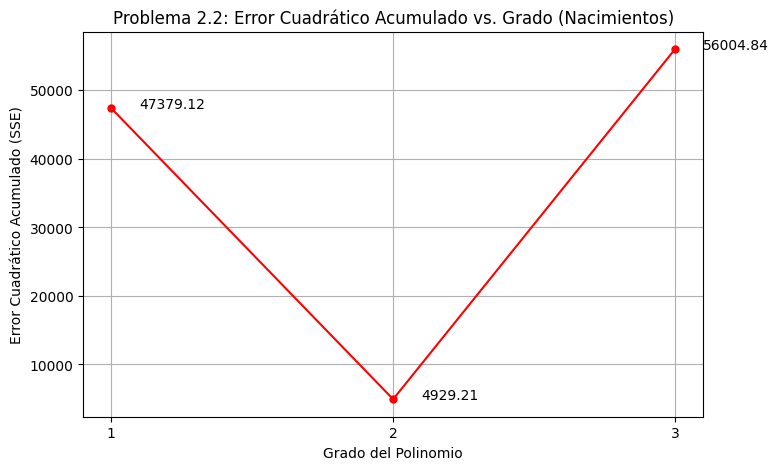

In [23]:
# Gráfico de Error Cuadrático Acumulado (SSE)
plt.figure(figsize=(8, 5))
plt.plot(grados, errores_nacimientos, 'o-', color='red', ms=5)

# Añadir etiquetas de error
for i, error in enumerate(errores_nacimientos):
    plt.text(grados[i] + 0.1, error, f'{error:.2f}', fontsize=10)

plt.title('Problema 2.2: Error Cuadrático Acumulado vs. Grado (Nacimientos)')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Error Cuadrático Acumulado (SSE)')
plt.xticks(grados)
plt.grid(True)
plt.show()